# Q1

In [1]:
y = as.matrix(c(15, 9, 3, 25, 7, 13))
z = as.matrix(c(10, 5, 7, 19, 11, 8))

model <- lm(y~z)
model

y_hat <- model$fitted.values
y_hat

residuals <- model$residuals
residuals


Call:
lm(formula = y ~ z)

Coefficients:
(Intercept)            z  
    -0.6667       1.2667  


1         2         3         4         5         6 
12.000000  5.666667  8.200000 23.400000 13.266667  9.466667

1         2         3         4         5         6 
 3.000000  3.333333 -5.200000  1.600000 -6.266667  3.533333

# Q2

In [2]:
path <- '../data/CompanyData.csv'
company_data <- read.csv(path)

In [3]:
colnames(company_data) <- c('z1', 'y', 'z2')

In [4]:
model <- lm(y~., data=company_data)
model


Call:
lm(formula = y ~ ., data = company_data)

Coefficients:
(Intercept)           z1           z2  
   0.013325     0.068058     0.005768  


In [5]:
summary(model)


Call:
lm(formula = y ~ ., data = company_data)

Residuals:
   Min     1Q Median     3Q    Max 
-4.954 -1.215 -0.316  1.686  6.224 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.013325   7.641453   0.002   0.9987  
z1          0.068058   0.027851   2.444   0.0445 *
z2          0.005768   0.004946   1.166   0.2817  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.863 on 7 degrees of freedom
Multiple R-squared:  0.5569,	Adjusted R-squared:  0.4303 
F-statistic: 4.399 on 2 and 7 DF,  p-value: 0.05792


https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/
- For general F-statistics with p-value 0.05792, If our alpha value is 0.05 then it's not significant, but if our alpha value is 0.1 then it is significant.
- For the partial signifance, z1 (0.0445) is significant for the alpha level of 0.05.

https://statisticsbyjim.com/regression/interpret-r-squared-regression/
- the model only edplain 55% of the variation

In [6]:
confint(model, newdata = company_data, level=0.95)

,2.5 %,97.5 %
(Intercept),-18.05584030,18.08249077
z1,0.00220035,0.13391485
z2,-0.00592749,0.01746398


intercept and beta 2 might not be significant

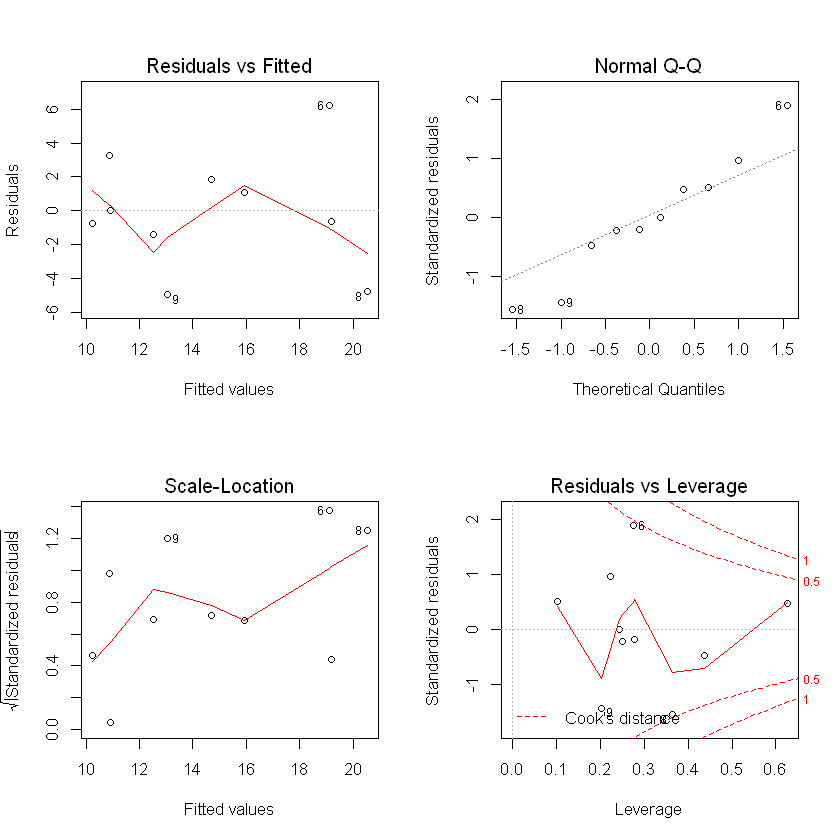

In [7]:
par(mfrow = c(2, 2))
plot(model)

1. Error Independent - No trend for residual plots
2. Normality - Seems like not normal but the point is too less
3. 

In [8]:
newdata = data.frame(z1=100, z2=500)
predict(model, newdata = newdata, interval = "prediction")

fit,lwr,upr
9.703207,-1.545611,20.95203


(g) yes. because the variation is not explained and the assumptions for regression model is violated.


Call:
lm(formula = y ~ z1, data = company_data)

Coefficients:
(Intercept)           z1  
    8.38497      0.04061  



Call:
lm(formula = y ~ z1, data = company_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2312 -3.3430 -0.9744  2.8273  6.2244 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  8.38497    2.67770   3.131   0.0140 *
z1           0.04061    0.01522   2.668   0.0285 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.949 on 8 degrees of freedom
Multiple R-squared:  0.4708,	Adjusted R-squared:  0.4046 
F-statistic: 7.117 on 1 and 8 DF,  p-value: 0.02846


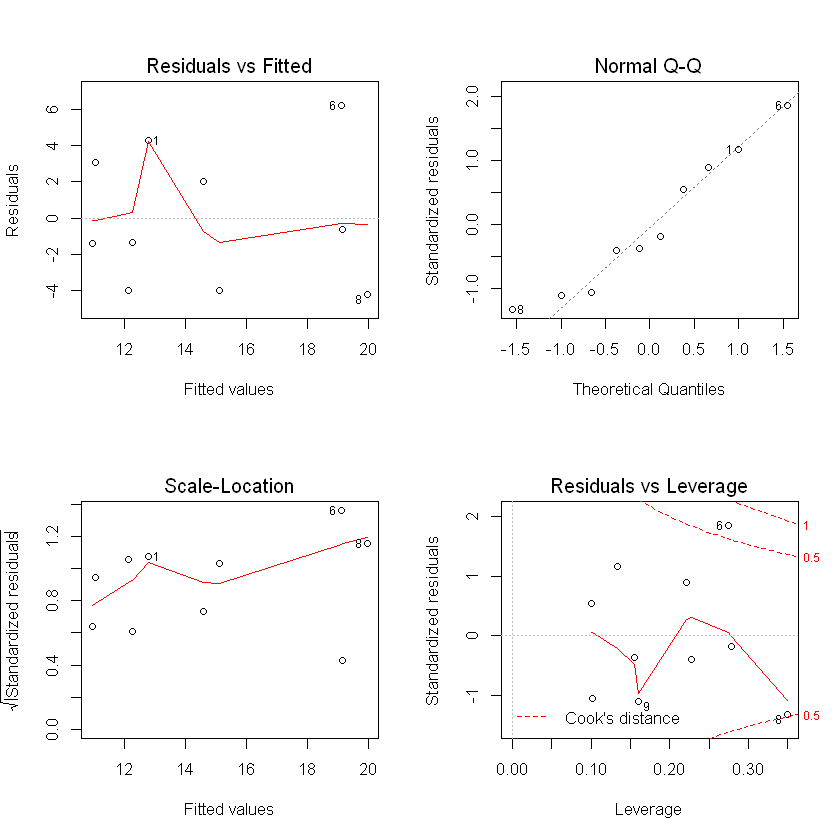

In [9]:
model <- lm(y~z1, data=company_data)
model

summary(model)
par(mfrow = c(2, 2))
plot(model)

The residual plot is still not really good. BUt then normal Q-Q plot is almost normal.

# Q3

In [10]:
cor(company_data, method='pearson')

,z1,y,z2
z1,1.0000000,0.6861360,-0.8450549
y,0.6861360,1.0000000,-0.4229366
z2,-0.8450549,-0.4229366,1.0000000


y is strong positive correlated with z1 and moderate negative correlated to z2.

In [11]:
cor(company_data, method='kendall')

,z1,y,z2
z1,1.0000000,0.4666667,-0.6888889
y,0.4666667,1.0000000,-0.3333333
z2,-0.6888889,-0.3333333,1.0000000


In [12]:
cor(company_data, method='spearman')

,z1,y,z2
z1,1.0000000,0.6727273,-0.8303030
y,0.6727273,1.0000000,-0.4424242
z2,-0.8303030,-0.4424242,1.0000000


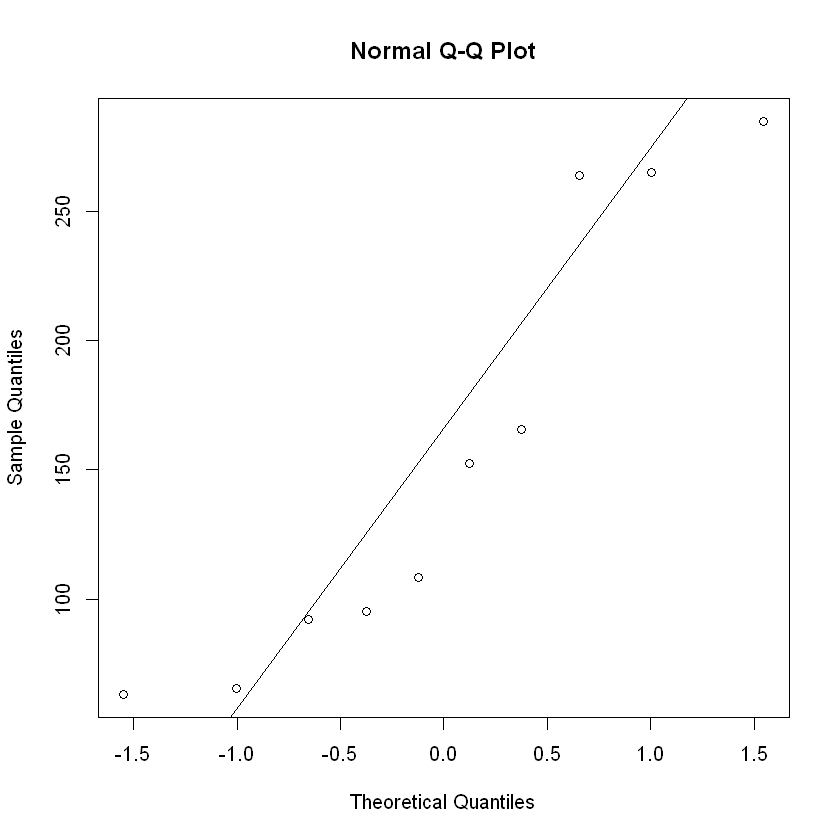

In [13]:
qqnorm(company_data$z1)
qqline(company_data$z1)

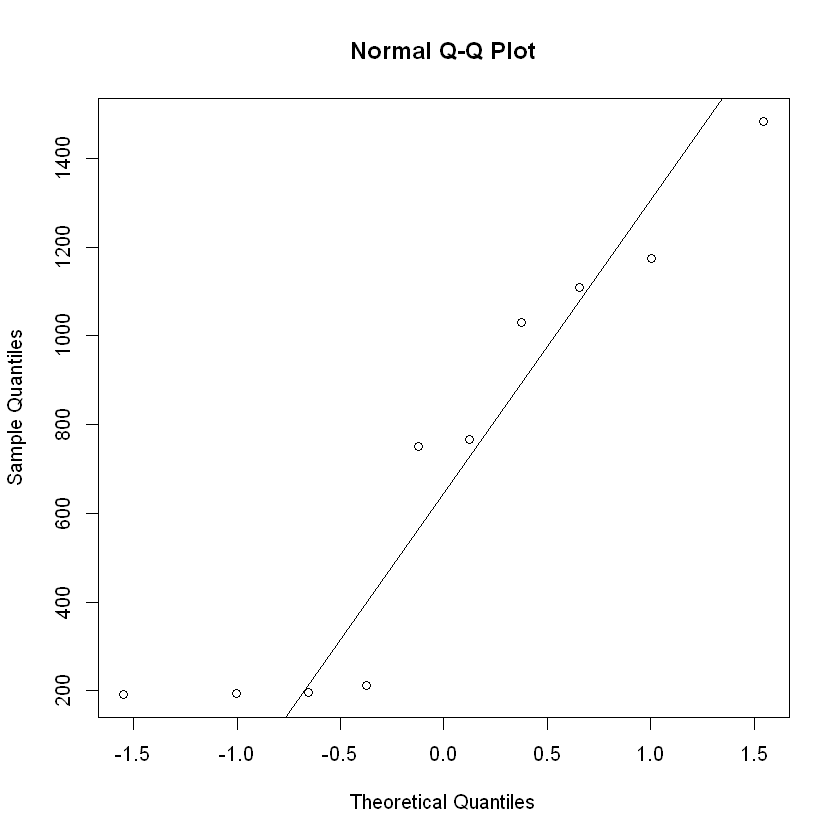

In [14]:
qqnorm(company_data$z2)
qqline(company_data$z2)

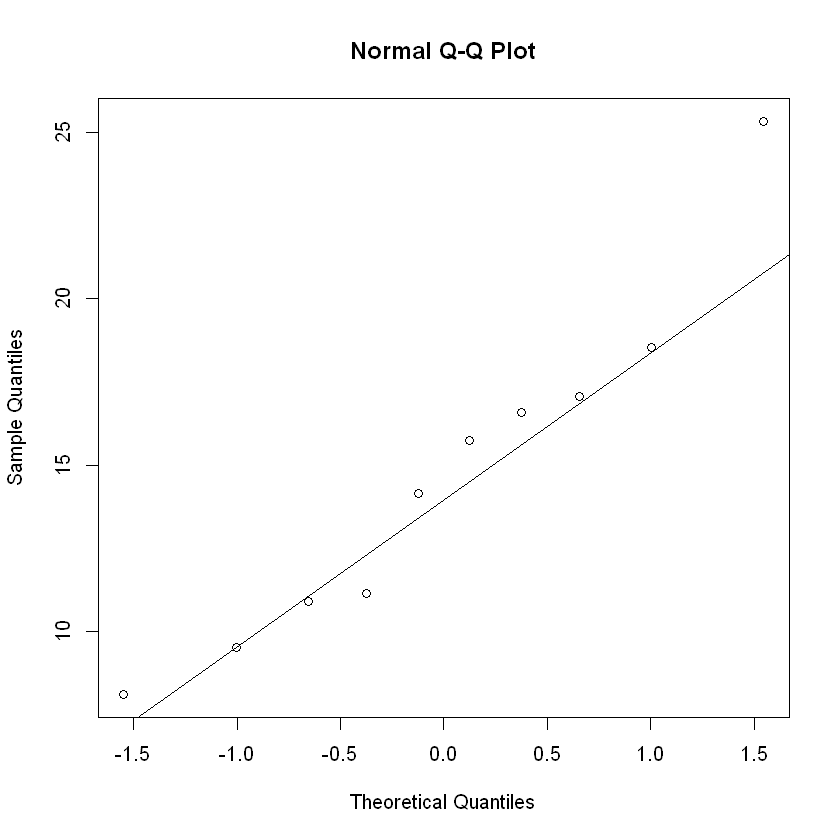

In [15]:
qqnorm(company_data$y)
qqline(company_data$y)

There might be outlier or data is not normal. Becauase of the data is too less.

In [16]:
library('ppcor')

Loading required package: MASS


- Peasron significant (data have to be normal and assuming the data is to be linear.)
- Kendall significant at 0.1 (non parametric)
- Spearman significant (non parametric)

The correlation matrix actually affect the significance

In [17]:
pcor(company_data, method='pearson')

,z1,y,z2
z1,1.0000000,0.6784894,-0.8417131
y,0.6784894,1.0000000,0.4033423
z2,-0.8417131,0.4033423,1.0000000
,z1,y,z2
z1,0.000000000,0.04452135,0.004434021
y,0.044521354,0.00000000,0.281719452
z2,0.004434021,0.28171945,0.000000000
,z1,y,z2
z1,0.000000,2.443628,-4.124579
y,2.443628,0.000000,1.166214


- y and z1 
- z1 and z2

As mentioned by Dr. Adriana, we need to look into the analysis and compare with the full correlation as well and observe how much does it differ.

In [18]:
pcor(company_data, method='kendall')

,z1,y,z2
z1,1.0000000,0.34684399,-0.63960215
y,0.3468440,1.00000000,-0.01848685
z2,-0.6396021,-0.01848685,1.00000000
,z1,y,z2
z1,0.00000000,0.1929863,0.01636854
y,0.19298631,0.0000000,0.94468243
z2,0.01636854,0.9446824,0.00000000
,z1,y,z2
z1,0.000000,1.30179548,-2.40059281
y,1.301795,0.00000000,-0.06938593


In [19]:
pcor(company_data, method='spearman')

,z1,y,z2
z1,1.0000000,0.6110055,-0.8027755
y,0.6110055,1.0000000,0.2816618
z2,-0.8027755,0.2816618,1.0000000
,z1,y,z2
z1,0.000000000,0.08046483,0.009195006
y,0.080464835,0.00000000,0.462796274
z2,0.009195006,0.46279627,0.000000000
,z1,y,z2
z1,0.000000,2.0420855,-3.5619828
y,2.042086,0.0000000,0.7766508
